In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\1.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\10.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\11.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\12.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\13.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\14.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf



In [29]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


print(
X_train)

print(Y_train)


[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(300, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [10]:

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:

history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
8/8 [==============================] - 27s 3s/step - loss: 7.3021 - accuracy: 0.3621 - val_loss: 1.0978 - val_accuracy: 0.3704
Epoch 2/20
8/8 [==============================] - 25s 3s/step - loss: 1.1048 - accuracy: 0.3169 - val_loss: 1.1078 - val_accuracy: 0.1481
Epoch 3/20
8/8 [==============================] - 27s 3s/step - loss: 1.0929 - accuracy: 0.3621 - val_loss: 1.1114 - val_accuracy: 0.0741
Epoch 4/20
8/8 [==============================] - 25s 3s/step - loss: 1.0812 - accuracy: 0.3992 - val_loss: 1.0982 - val_accuracy: 0.2963
Epoch 5/20
8/8 [==============================] - 25s 3s/step - loss: 1.0270 - accuracy: 0.4815 - val_loss: 0.9312 - val_accuracy: 0.5185
Epoch 6/20
8/8 [==============================] - 25s 3s/step - loss: 0.7312 - accuracy: 0.6543 - val_loss: 0.5265 - val_accuracy: 0.8148
Epoch 7/20
8/8 [==============================] - 25s 3s/step - loss: 0.4123 - accuracy: 0.8354 - val_loss: 0.2823 - val_accuracy: 0.8519
Epoch 8/20
8/8 [==================

In [36]:
#model.save('braintumor.h5')

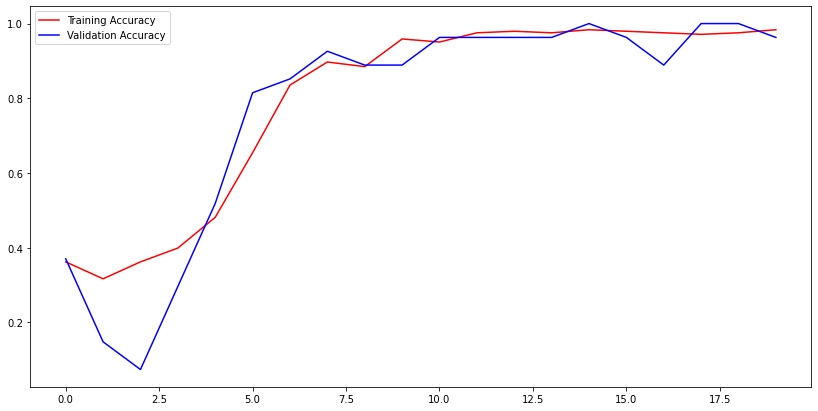

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

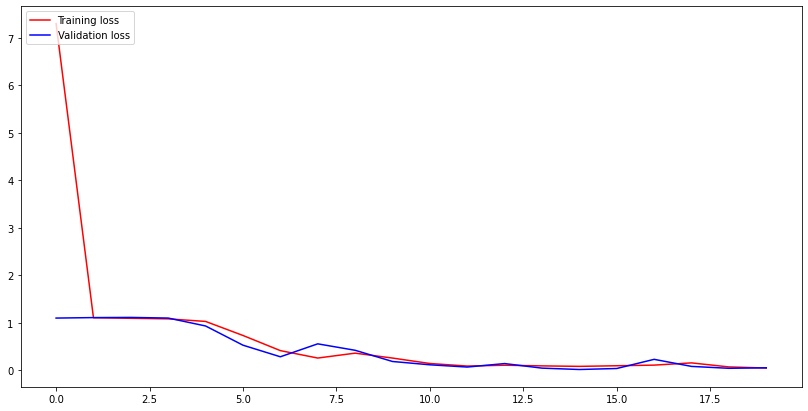

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()


In [54]:
img = cv2.imread('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Training\\glioma_tumor\\71.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [55]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

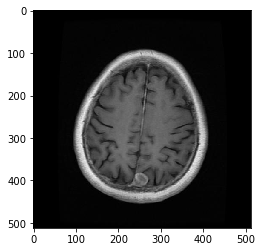

In [56]:
from tensorflow.keras.preprocessing import image
img = image.load_img('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Training\\glioma_tumor\\71.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [61]:
a=model.predict(img_array)
indices = a.argmax()
indices

print( 'predictions Value-----------====', indices)

1/1 [==============================] - 0s 51ms/step
predictions Value-----------==== 0
